### Discription: 
This notebook is a baseline approach towards dealing with the problem of predicting heart disease. The dataset belongs to the competition 'Predicting Heart Disease
Playground Series - Season 6 Episode 2'. This is completely my own approach towards dealing with this problem, I hope it'll be helpful to whoever reads this.

## Importing the training dataset:

In [20]:
import pandas as pd

train_path = '/kaggle/input/playground-series-s6e2/train.csv'
train_df = pd.read_csv(train_path)

train_df.head()

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


The data is loaded successfully.
On closer observation the dataset consists of categorical as well as numerical features. The categorical features seem to be already encoded.

## ![](http://)Basic EDA:
* Checking for null values
* Check if the target classes are balanced or imbalanced
* Also checking the distribution of numerical features
* Checking out the std and means

In [21]:
train_df.info()

train_df.isna().sum() #Checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Hear

id                         0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

* Total number of samples = 630000
* No null values are present, so theres no need for imputing anywhere (one less task to do)
* Since all the features are already encoded theres no way to differentiate the numerical features from categorical ones directly, insted we'll have to do it manually but doing this right now will save a lot of time at the time of preprocessing.
* On even closer observation we get to see that teh categorical features arent one-hot encoded either.

In [22]:
#seperating numerical and categorical columns:
num_cols = ['Age','BP','Cholesterol','Max HR','ST depression','Number of vessels fluro','Thallium','EKG results',]
cat_cols = ['Sex','Chest pain type','FBS over 120','Exercise angina','Slope of ST']

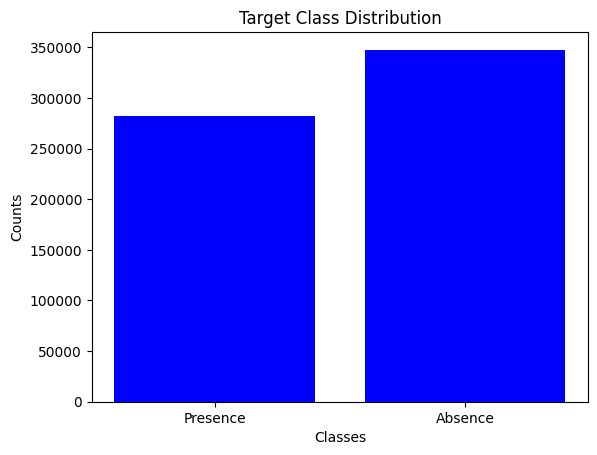

In [23]:
# Checking the target class distribution:
import matplotlib.pyplot as plt
from collections import Counter

counts = Counter(train_df['Heart Disease'])
plt.bar(counts.keys(),counts.values(),color='blue')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Target Class Distribution')
plt.show()

The target classes seem to be imbalanced.

Now lets look at numerical feature distribution as well as categorical feature class distriutions

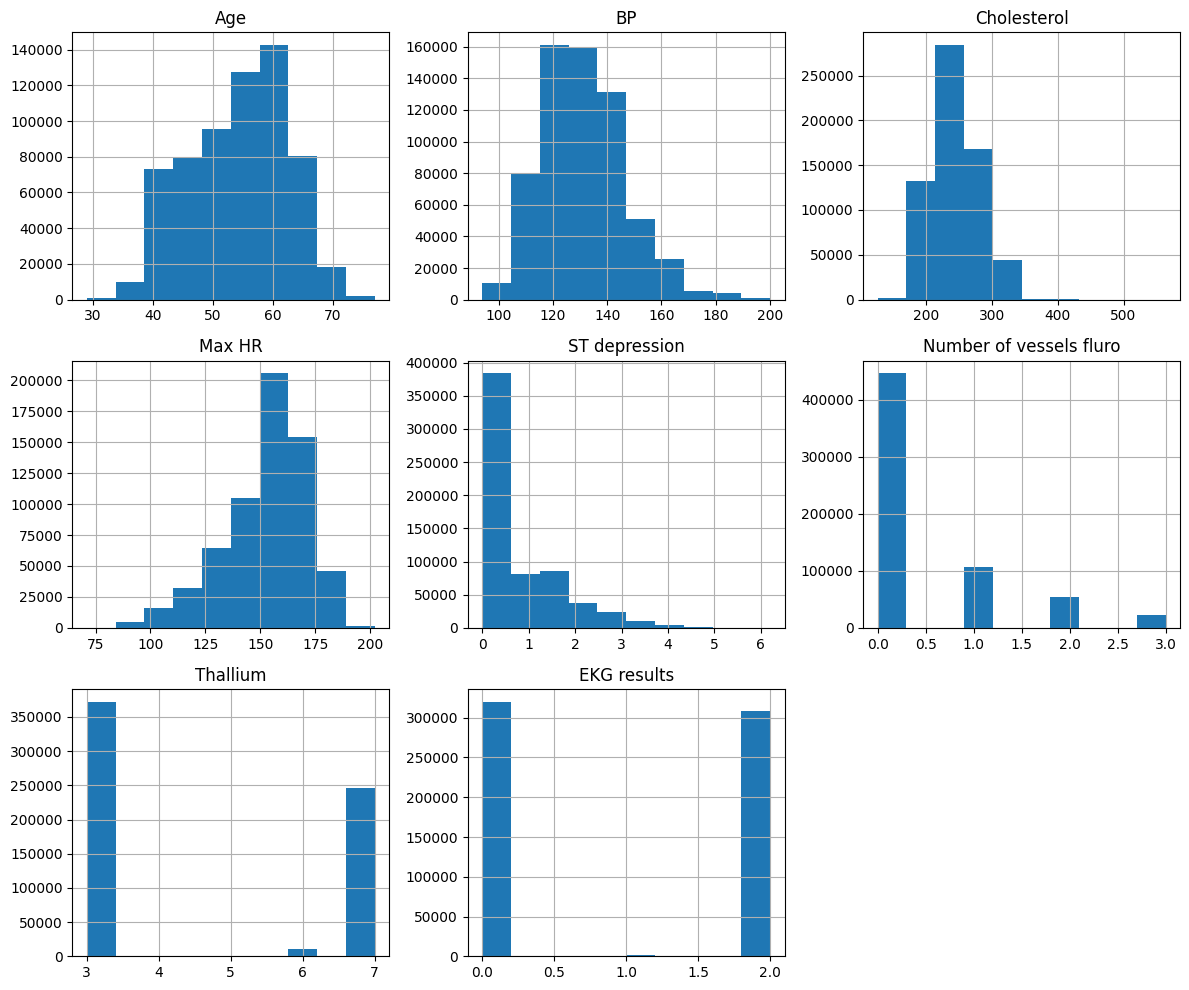

In [24]:
import seaborn as sns

#For numerical features
train_df[num_cols].hist(figsize=(12,10))
plt.tight_layout()
plt.show()

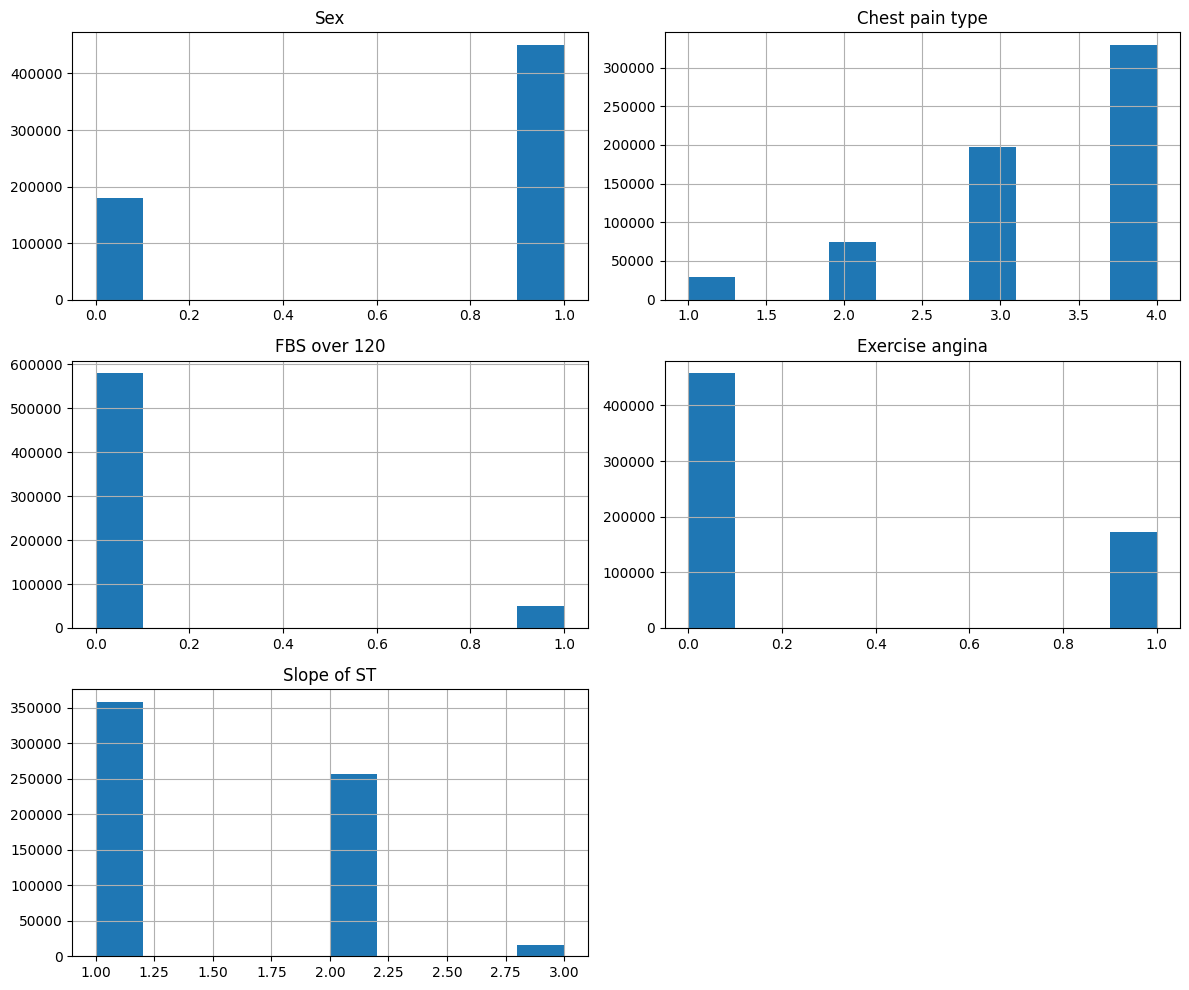

In [25]:
#for categorical features
train_df[cat_cols].hist(figsize=(12,10))
plt.tight_layout()
plt.show()

After looking at the distributions of both categorical and numerical features few things could be concluded:
* Categorical feature clases are well distributed with a areound 1000 samples min of each class present, wont call them well balanced though.
* Numerical features arent really well distributed, a few are right skewed and some are left skewed.

In [26]:
# Checking the means and stds of numerical columns 
train_df[num_cols].describe()

,Age,BP,Cholesterol,Max HR,ST depression,Number of vessels fluro,Thallium,EKG results
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,54.136706,130.497433,245.011814,152.816763,0.716028,0.451040,4.618873,0.981660
std,8.256301,14.975802,33.681581,19.112927,0.948472,0.798549,1.950007,0.998783
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,3.000000,0.000000
25%,48.000000,120.000000,223.000000,142.000000,0.000000,0.000000,3.000000,0.000000
50%,54.000000,130.000000,243.000000,157.000000,0.100000,0.000000,3.000000,0.000000
75%,60.000000,140.000000,269.000000,166.000000,1.400000,1.000000,7.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,7.000000,2.000000


From here onwards we can start creating preprocessing pipelines and later head into baseline model development. 

## Preprocessing:
This part will contain data preprocessing pipelines which will include:
* Scaling of numerical features
* One-hot encoding categorical features
* Creating a Training and a Validation set for evaluation of training process

In [27]:
#dropping useless redundant columns 
train_df = train_df.drop('id',axis=1)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

#pipelines
num_pipe = Pipeline([
    ('scaler',StandardScaler())
])
cat_pipe = Pipeline([
    ('encoder',OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('num',num_pipe,num_cols),
    ('cat',cat_pipe,cat_cols),
])

In [29]:
#seperating traget from features
X = train_df.drop('Heart Disease',axis=1)
y = train_df['Heart Disease']

Since we'll be using neural networks/ deeplearning approach as out baseline, we'll also need to encode our labels into [0,1]

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [31]:
#preprocessing the dataset
X_processed = preprocessor.fit_transform(X)

In [32]:
X_processed.shape #to see how many features are going as input in the model, so that the model is built accordingly

(630000, 21)

In [33]:
#splitting the dataset into trian/validate splits
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X_processed,y_encoded,test_size=0.2,random_state=42,stratify=y)

## Baseline Model:
Won't be using Logistic regression or SVMs for baseline since the dataset is huge. Insted the baseline will be set on a simple deeplearning model with 2-3 dense layers with relu activation without any regulariation or dropout layers.The last layer/output layer will be a densly connected layer with sigmoid activation since we are dealing witha  binary classification problem.

No feature engineering is considered in this iteration sicne its supposed to set a baseline on the raw data provided.

In [34]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "0"  # 0 = hide all, 1 = hide INFO, 2 = hide WARNING, 3 = hide ERROR
#The above piece of code is to hide the warnings

### Defining model:

In [35]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(21,), name='input_layer')
x = layers.Dense(42, activation='relu', name='Dense_layer_1') (inputs)
x = layers.Dense(21, activation='relu', name='Dense_layer_2') (x)
x = layers.Dense(10, activation='relu', name='Dense_layer_3') (x)
outputs = layers.Dense(1, activation='sigmoid', name='Ouput_layer') (x)

model = keras.Model(inputs=inputs, outputs=outputs, name='baseline_network')

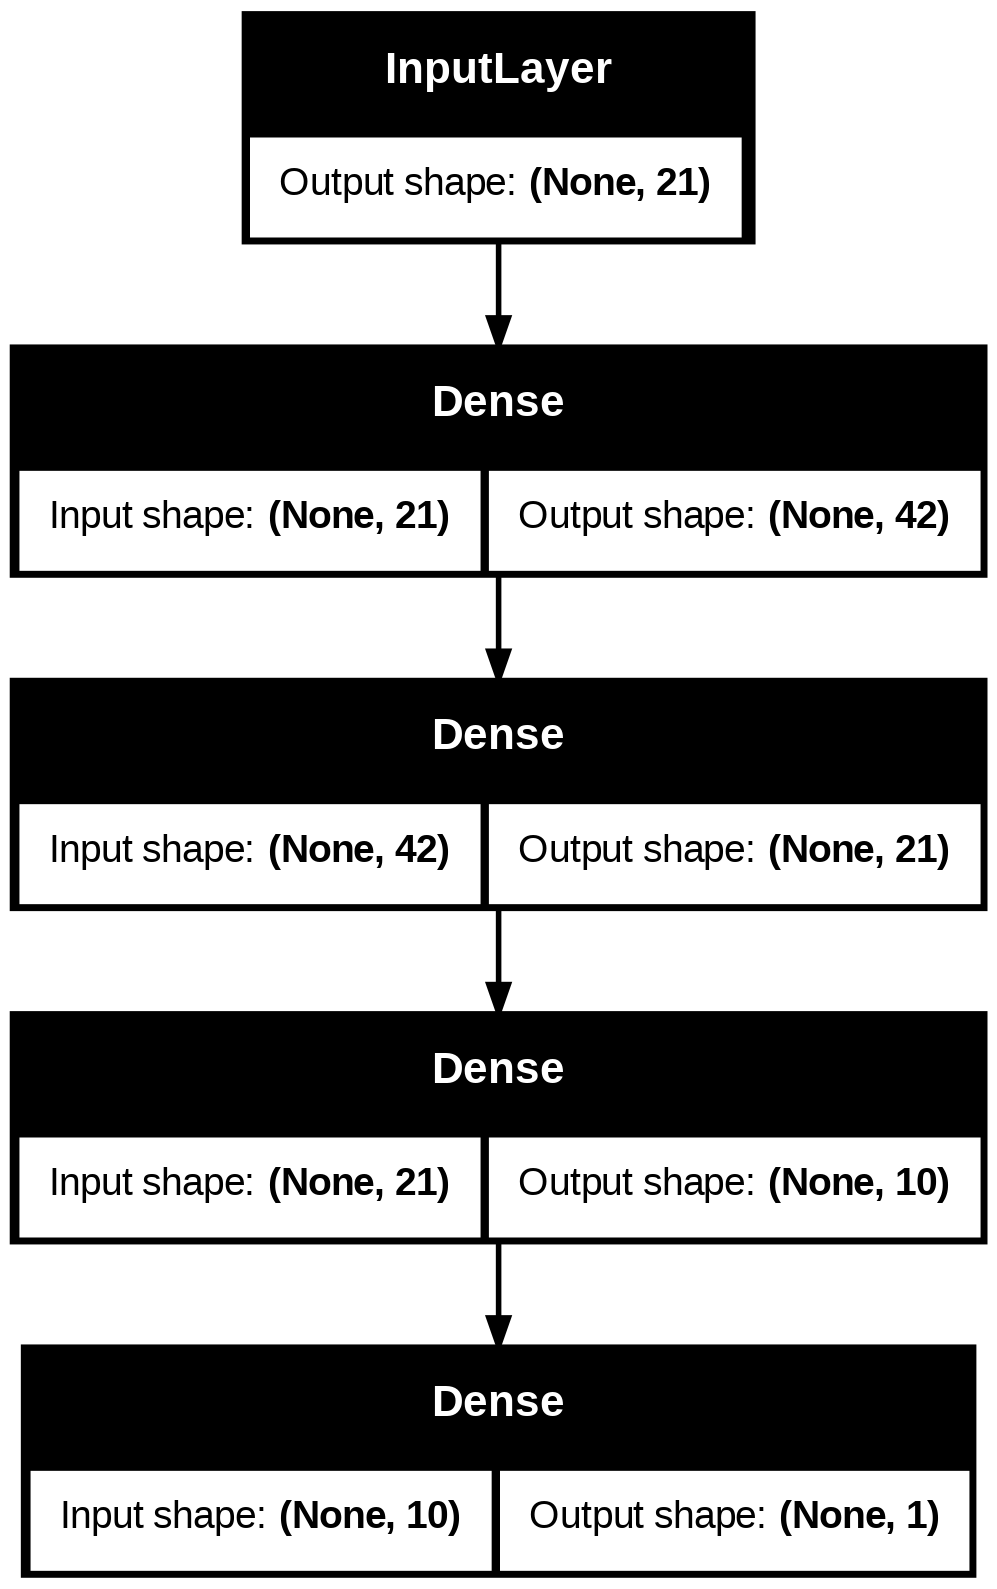

In [36]:
keras.utils.plot_model(model, show_shapes=True)

In [37]:
model.summary()

Model: "baseline_network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 21)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_layer_1 (Dense)           │ (None, 42)             │           924 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_layer_2 (Dense)           │ (None, 21)             │           903 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_layer_3 (Dense)           │ (None, 10)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Ouput_layer (Dense)             │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,058 (8.04 KB)

 Trainable params: 2,058 (8.04 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the model:
Using default optimizer **rmsprop**, the loss function will be **binary_crossentropy** since we are dealing with a binary_classification problem. Finally the metrics to monitor the performance will be ['accuracy','roc_auc'] since roc_auc is the metric that our test files area gonna be evaluated on.

In [38]:
from tensorflow.keras.metrics import AUC

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy',AUC(name='roc_auc')])

#saving the best model where the loss function is at its lowest to reuse
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_classifier_model.keras',
        save_best_only=True,
        monitor='val_loss')
]

In [39]:
#training the model on training set and evaluating on validation set
history = model.fit(X_train,
             y_train,
             epochs=400,
             batch_size=300,
             callbacks=callbacks,
             validation_data=(X_val,y_val),
             verbose=0)

In [43]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'roc_auc', 'val_accuracy', 'val_loss', 'val_roc_auc'])

### Plotting loss and metrics graphs:

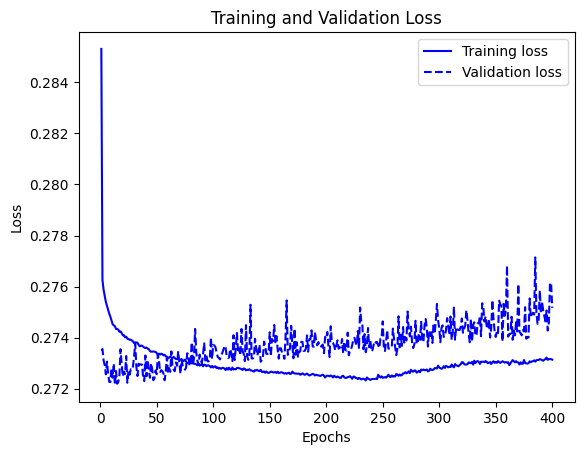

In [45]:
#training loss and validation loss
epochs=400
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1,epochs+1),train_loss,'b-',label='Training loss')
plt.plot(range(1,epochs+1),val_loss,'b--',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Model trains correctly, but begins overfitting after ~120 epochs.
It is sometimes observed that validation loss is slightly lower than training loss in the early epochs. This is normal because training loss is computed during mini-batch updates while the model weights are still changing, whereas validation loss is computed at the end of each epoch on stable weights. Therefore, this behavior does not necessarily indicate a problem.

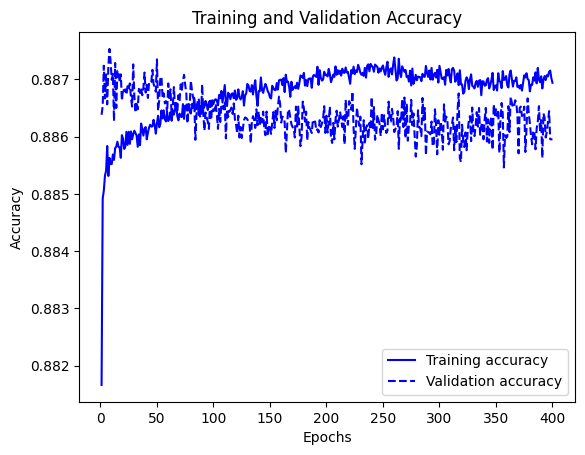

In [47]:
#training loss and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(range(1,epochs+1),train_acc,'b-',label='Training accuracy')
plt.plot(range(1,epochs+1),val_acc,'b--',label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

The accuracy behaves normally as well since in later epochs it starts overfitting as usual

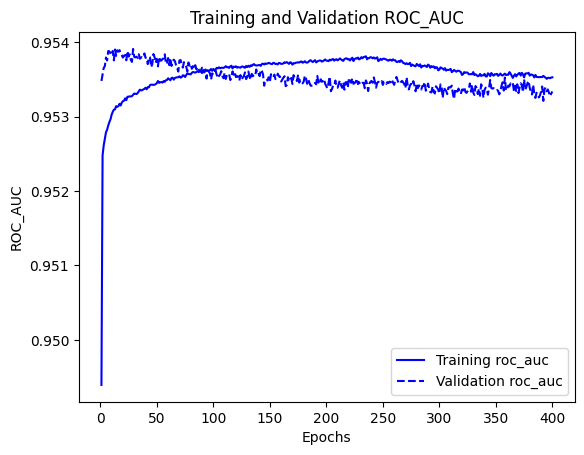

In [49]:
#training loss and validation roc_auc
train_ruc_auc = history.history['roc_auc']
val_ruc_auc = history.history['val_roc_auc']

plt.plot(range(1,epochs+1),train_ruc_auc,'b-',label='Training roc_auc')
plt.plot(range(1,epochs+1),val_ruc_auc,'b--',label='Validation roc_auc')
plt.xlabel('Epochs')
plt.ylabel('ROC_AUC')
plt.legend()
plt.title('Training and Validation ROC_AUC')
plt.show()

This is pretty normal too.

Finally we can conclude that if we had to use the current model architecture we'd have to stop training around 30-70 epochs cuz after that overfitting begins.
We already provided a callback to save the model where the val_loss is at its lowest so we wont have to retrain a new model insted we'll use the best_saved model.

## Importing test data:

In [51]:
#Importing the test data
test_path = '/kaggle/input/playground-series-s6e2/test.csv'
test_df = pd.read_csv(test_path)

test_df.head() #to check if the test data is loaded safely

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,630000,58,1,3,120,288,0,2,145,1,0.8,2,3,3
1,630001,55,0,2,120,209,0,0,172,0,0.0,1,0,3
2,630002,54,1,4,120,268,0,0,150,1,0.0,2,3,7
3,630003,44,0,3,112,177,0,0,168,0,0.9,1,0,3
4,630004,43,1,1,138,267,0,0,163,0,1.8,2,0,7


## Test data preprocessing:
Dropping the redundant columns same as we did for training data:

In [54]:
X_test = test_df.drop('id',axis=1)

Applying same preprocessing pipeline on test data:

In [58]:
X_test_processed = preprocessor.transform(X_test)
X_test_processed.shape #making sure the number of features are same as our processed training data

(270000, 21)

## Retriving the best saved model:

In [59]:
best_model = keras.models.load_model('best_classifier_model.keras')

## Predicting on test data:
In keras models the **predict()** method gives back teh probabilities itself so we wont have to perform any transformations on the predicted output by the model.

In [62]:
y_pred_proba = best_model.predict(X_test_processed)

8438/8438 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


## Preparing the submission csv:

In [66]:
y_pred_proba = y_pred_proba.flatten() #converting from 2D to 1D

Submission = pd.DataFrame({
    'id':test_df['id'],
    'Heart Disease':y_pred_proba
})

Submission.to_csv('Baseline_submission.csv',index=False)

The current model represents a baseline deep learning approach and leaves room for further improvement. In future iterations, the architecture can be enhanced through techniques such as regularization, dropout layers, and hyperparameter tuning to improve generalization and reduce overfitting. Additionally, the overall performance can be further boosted through more effective feature engineering and advanced data preprocessing strategies.